In [80]:
def get_list(start, end, step):
    lst = []
    round_list = []
    st = start
    
    while st < end:
        lst.append(st)
        st += step
    for i in lst:
        round_list.append(round(i, 2))
    return round_list

In [81]:
lst = get_list(0, 0.4, 0.05)
print(lst)

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]


In [82]:
lst= get_list(10, 50, 5)
print(lst)

[10, 15, 20, 25, 30, 35, 40, 45]


In [83]:
import random
import cv2

"""이미지 증강 함수"""

def image_augmentation(files, index, limit, image_width, image_height):
    random_files = []
    X_array =[]
    y_array = []
    images = []
    data = []
    
#     print('파일 리스트')
#     print(files)
    
    while True:
        try:
            random_files.append(random.choice(files))
            file = random_files[-1]
            print('선택된 파일')
            print(file)

            img_bgr = cv2.imread(file , cv2.IMREAD_COLOR)
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img_rgb, (image_width, image_height))
            
#             img90 =  cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)  # 시계 방향으로 90도 회전
#             img180 =  cv2.rotate(img, cv2.ROTATE_180)  # 180도 회전
#             img270 =  cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # 반시계 방향 90도 회전

            images.append(img)
            images.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))  # 시계 방향으로 90도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_180))  # 180도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)) # 반시계 방향 90도 회전
            
            for image in images:
                data = np.asarray(image)
                X_array.append(data)
                y_array.append(index)
        
            if len(X_array) >= limit:
                break
        
        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
            #             remove(f)
        pass 
    

    
    return X_array, y_array

In [84]:
import random

"""이미지 뽑기 함수"""

def image_selector(files, index, limit, image_width, image_height):
    random_files = []
    X_array = []
    y_array = []
    data = []
    
    for i in range(limit):
        random_files.append(random.choice(files))
#     print(random_files)
    
    for i, f in enumerate(random_files):
        try:
            img_bgr = cv2.imread(f, cv2.IMREAD_COLOR)
            image_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            img = cv2.resize(image_rgb, (image_width, image_height))

            data = np.asarray(img)
            #Y는 0 아니면 1이니까 index값으로 넣는다.

            X_array.append(data)
            y_array.append(index)

        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
    #             remove(f)
            pass 
            
    return X_array, y_array

In [85]:
import os, glob

"""하위 폴더 및 파일 탐색"""
    
def is_dir_file(dir_path, dir_list, img_limit, img_limit_list):
    
    folders = os.listdir(dir_path)
    
    for folder in folders:
        path_detail = os.path.join(dir_path, folder)
        
        if os.path.isdir(path_detail):
            new_img_limit = int(img_limit / len(folders))
            
            is_dir_file(path_detail, dir_list, new_img_limit, img_limit_list)
        else:    
            print(dir_path + ' img limit : ' + str(img_limit))
            dir_list.append(dir_path)
            img_limit_list.append(img_limit)
            return

In [86]:
#본 코드 시작

# from PIL import Image
# import glob, sys, numpy as np
# from  keras.utils import np_utils

import cv2
import os, glob
from os import remove
import numpy as np

img_dir = './binary_cnn/train'
# categories = ['ad', 'non_ad']
categories = os.listdir(img_dir)

sum = 0
ad_index = 0
non_ad_index = 1
image_width, image_height = 128, 128

# file_directory = []
file_list_index = []
img_limit_list = []
X = []
y = []


np_classes = len(categories)    
print(categories)

for i, category in enumerate(categories):
    file_directory = []
    img_dir_detail = os.path.join(img_dir, category)
    
    if i == ad_index:
        img_limit = 1600
    elif i == non_ad_index:
        img_limit = 1600
        
    is_dir_file(img_dir_detail, file_directory, img_limit, img_limit_list)
    
    for directory in file_directory:
        file_list_index.append([i, directory])
#     file_list_index.append([i, file_directory])
    
# print(file_directory)
print(file_list_index)

for lst in file_list_index:
#     print(lst)
    print(lst[0])

count = 0

# for (index, directories) in file_list_index:
for index, directory in file_list_index:
#     for directory in directories:
    print(directory)
    files = glob.glob(directory + "/*.jpg")
    len_file = len(files)

#     if index == ad_index:
#         img_limit = 20
#     elif index == non_ad_index:
#         img_limit = 100

    img_limit = img_limit_list[count]

    if len_file <img_limit:
        X_temp, y_temp = image_augmentation(files, index, img_limit, image_width, image_height)
    else:
        X_temp, y_temp = image_selector(files, index, img_limit, image_width, image_height)

#         X.__add__(X_temp)
#         y.__add__(y_temp)

    X = X + X_temp
    y = y + y_temp

    len_file = len(X_temp)
    print(directory + '파일 길이 : ' + str(len_file))
    sum += len_file
    count += 1
        
    
print('총 파일 길이 : ' + str(sum))

X = np.array(X)
Y = np.array(y)

print(len(X), len(Y))

"""이미지 크기 인자를 조절하면서 적용"""

['ad', 'non_ad']
./binary_cnn/train\ad\bill\classification\1 img limit : 72
./binary_cnn/train\ad\bill\non_classification img limit : 72
./binary_cnn/train\ad\coin\1 img limit : 145
./binary_cnn/train\ad\general_product\classification\1 img limit : 72
./binary_cnn/train\ad\general_product\non_classification img limit : 72
./binary_cnn/train\ad\graph\classification\1 img limit : 72
./binary_cnn/train\ad\graph\non_classification img limit : 72
./binary_cnn/train\ad\human\1 img limit : 29
./binary_cnn/train\ad\human\2 img limit : 29
./binary_cnn/train\ad\human\3 img limit : 29
./binary_cnn/train\ad\human\4 img limit : 29
./binary_cnn/train\ad\human\ambiguous_data img limit : 29
./binary_cnn/train\ad\lotto_N\1 img limit : 145
./binary_cnn/train\ad\lotto_P\1 img limit : 145
./binary_cnn/train\ad\microbe\1 img limit : 145
./binary_cnn/train\ad\part_of_human\1 img limit : 29
./binary_cnn/train\ad\part_of_human\2 img limit : 29
./binary_cnn/train\ad\part_of_human\3 img limit : 29
./binary_cnn/

./binary_cnn/train\ad\microbe\1파일 길이 : 180
./binary_cnn/train\ad\part_of_human\1
./binary_cnn/train\ad\part_of_human\1파일 길이 : 29
./binary_cnn/train\ad\part_of_human\2
./binary_cnn/train\ad\part_of_human\2파일 길이 : 29
./binary_cnn/train\ad\part_of_human\3
./binary_cnn/train\ad\part_of_human\3파일 길이 : 29
./binary_cnn/train\ad\part_of_human\4
OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

1 번째에서 에러 
./binary_cnn/train\ad\part_of_human\4파일 길이 : 28
./binary_cnn/train\ad\part_of_human\ambiguous_data
./binary_cnn/train\ad\part_of_human\ambiguous_data파일 길이 : 29
./binary_cnn/train\ad\photoshop\classification\1
./binary_cnn/train\ad\photoshop\classification\1파일 길이 : 18
./binary_cnn/train\ad\photoshop\classification\2
./binary_cnn/train\ad\photoshop\classification\2파일 길이 : 18
./binary_cnn/train\ad\photoshop\classification\3
./binary_cnn/train\ad\photoshop\classification\3파일 길이 : 18
./bina

'이미지 크기 인자를 조절하면서 적용'

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(X_train.shape)
print(X_train.shape[0])
print(y_train.shape)
print(y_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))

(2580, 128, 128, 3)
2580
(2580,)
(861,)
[1360 1220]
[457 404]


In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [89]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [90]:
# import os




# with K.tf_ops.device('/device:GPU:0'):
model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#     model_dir = 'C:\\Users\\kimkm\\광고\\model'
#     if not os.path.exists(model_dir):
#         os.mkdir(model_dir)
#     model_path = model_dir + "\\ad_non_ad_classify.model"
    
#     checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)       

In [92]:
history = []
val_evaluate = []

for validation in get_list(0, 0.4, 0.05):
    history.append(model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split = validation, verbose=1))
    val_evaluate.append(model.evaluate(X_test, y_test)[1] * 100)

Epoch 1/20
41/41 [==============================] - 20s 498ms/step - loss: 0.5951 - accuracy: 0.7310
Epoch 2/20
41/41 [==============================] - 22s 530ms/step - loss: 0.2655 - accuracy: 0.8950
Epoch 3/20
41/41 [==============================] - 23s 558ms/step - loss: 0.1302 - accuracy: 0.9570
Epoch 4/20
41/41 [==============================] - 23s 558ms/step - loss: 0.0587 - accuracy: 0.9818
Epoch 5/20
41/41 [==============================] - 23s 559ms/step - loss: 0.0384 - accuracy: 0.9891
Epoch 6/20
41/41 [==============================] - 23s 572ms/step - loss: 0.0211 - accuracy: 0.9942
Epoch 7/20
41/41 [==============================] - 24s 588ms/step - loss: 0.0149 - accuracy: 0.9977
Epoch 8/20
41/41 [==============================] - 24s 588ms/step - loss: 0.0124 - accuracy: 0.9965
Epoch 9/20
41/41 [==============================] - 24s 597ms/step - loss: 0.0170 - accuracy: 0.9961
Epoch 10/20
41/41 [==============================] - 23s 568ms/step - loss: 0.0095 - accura

27/27 [==============================] - 2s 89ms/step - loss: 0.0312 - accuracy: 0.9895
Epoch 1/20
35/35 [==============================] - 20s 579ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 0.9897
Epoch 2/20
35/35 [==============================] - 20s 568ms/step - loss: 5.1655e-04 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 0.9974
Epoch 3/20
35/35 [==============================] - 20s 571ms/step - loss: 3.3774e-04 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9974
Epoch 4/20
35/35 [==============================] - 20s 574ms/step - loss: 4.8431e-04 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9974
Epoch 5/20
35/35 [==============================] - 20s 575ms/step - loss: 3.0019e-04 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9948
Epoch 6/20
35/35 [==============================] - 20s 576ms/step - loss: 2.9905e-04 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9974
Epoch 7/20
35/35 [================

Epoch 15/20
31/31 [==============================] - 19s 614ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0131 - val_accuracy: 0.9969
Epoch 16/20
31/31 [==============================] - 19s 599ms/step - loss: 0.0142 - accuracy: 0.9964 - val_loss: 0.6194 - val_accuracy: 0.8481
Epoch 17/20
31/31 [==============================] - 18s 590ms/step - loss: 0.0098 - accuracy: 0.9953 - val_loss: 0.1153 - val_accuracy: 0.9519
Epoch 18/20
31/31 [==============================] - 18s 590ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 0.9907
Epoch 19/20
31/31 [==============================] - 19s 611ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 0.9938
Epoch 20/20
27/27 [==============================] - 2s 74ms/step - loss: 0.0446 - accuracy: 0.9895
Epoch 1/20
29/29 [==============================] - 19s 646ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9935
Epoch 2/20
29/29 [===================

25/25 [==============================] - 16s 636ms/step - loss: 3.2917e-04 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9981
Epoch 10/20
25/25 [==============================] - 16s 645ms/step - loss: 3.0466e-04 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9981
Epoch 11/20
25/25 [==============================] - 16s 654ms/step - loss: 2.5238e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9981
Epoch 12/20
25/25 [==============================] - 16s 652ms/step - loss: 2.0109e-04 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9981
Epoch 13/20
25/25 [==============================] - 16s 642ms/step - loss: 2.9416e-04 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9981
Epoch 14/20
25/25 [==============================] - 16s 630ms/step - loss: 2.7921e-04 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9971
Epoch 15/20
25/25 [==============================] - 16s 630ms/step - loss: 2.8414e-04 - accuracy: 1.0000 - val_loss: 0.0133

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
[99.18699264526367, 98.72241616249084, 98.95470142364502, 99.41927790641785, 99.41927790641785, 98.95470142364502, 98.83856177330017, 97.90940880775452, 98.83856177330017]


Text(0, 0.5, 'accuracy')

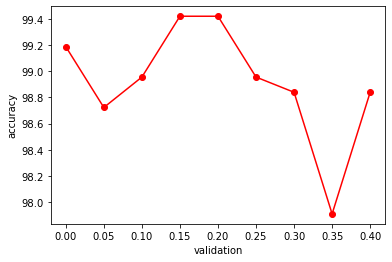

In [93]:
import matplotlib.pyplot as plt

val_list = get_list(0, 0.4, 0.05)

print(val_list)
print(val_evaluate)

plt.plot(val_list, val_evaluate, 'ro-')
plt.xlabel('validation')
plt.ylabel('accuracy')

In [94]:
idx = val_evaluate.index(max(val_evaluate))
validation = val_list[idx]
print(validation)

0.15


In [ ]:
history = []
epoch_evaluate = []

for epoch in range(10, 50, 5):
    history.append(model.fit(X_train, y_train, batch_size=64, epochs=epoch, validation_split = validation, verbose=1))
    epoch_evaluate.append(model.evaluate(X_test, y_test)[1] * 100)

Epoch 1/10
35/35 [==============================] - 20s 583ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0500 - val_accuracy: 0.9871
Epoch 2/10
35/35 [==============================] - 20s 582ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0321 - val_accuracy: 0.9871
Epoch 3/10
35/35 [==============================] - 20s 576ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 0.9871
Epoch 4/10
35/35 [==============================] - 20s 580ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9922
Epoch 5/10
35/35 [==============================] - 20s 575ms/step - loss: 7.4831e-04 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 0.9948
Epoch 6/10
35/35 [==============================] - 20s 573ms/step - loss: 6.6129e-04 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 0.9922
Epoch 7/10
35/35 [==============================] - 20s 575ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0400 - val_accuracy

35/35 [==============================] - 23s 648ms/step - loss: 0.0035 - accuracy: 0.9986 - val_loss: 0.1083 - val_accuracy: 0.9638
Epoch 11/25
35/35 [==============================] - 22s 628ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9974
Epoch 12/25
35/35 [==============================] - 25s 718ms/step - loss: 7.2785e-04 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9948
Epoch 13/25
14/35 [===========>..................] - ETA: 13s - loss: 3.7247e-04 - accuracy: 1.0000

In [ ]:
epoch_list = get_list(10, 50, 5)
    
print(epoch_list)
print(epoch_evaluate)

plt.plot(epoch_list, epoch_evaluate, 'ro-')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
idx = epoch_evaluate.index(max(epoch_evaluate))
epoch = epoch_list[idx]
print(epoch)

In [ ]:
"""end를 포함하는 리스트 반환
    2의 배수만큼 스텝을 밟음"""

def double_range(start, end): 
    lst = []
    st = start
    try:
        while st <= end:
            lst.append(st)
            st *= 2
    except ZeroDivisionError:
        print('0으로 나눌 수 없습니다.')
    return lst

In [ ]:
history = []
batch_evaluate = []

for batch in double_range(2, 1024):
    history.append(model.fit(X_train, y_train, batch_size=batch, epochs=epoch, validation_split = validation, verbose=1))
    batch_evaluate.append(model.evaluate(X_test, y_test)[1] * 100)

In [ ]:
plt.plot(double_range(2, 1024), batch_evaluate, 'ro-')
plt.label('batch size')
plt.ylabel('accuracy')

In [ ]:
batch_list = double_range(2, 1024)

idx = batch_evaluate.index(max(batch_evaluate))
batch = batch_list[idx]
print(batch)

In [ ]:
history = model.fit(X_train, y_train, batch_size=batch, epochs=epoch, validation_split=validation, verbose=1)

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.around(y_pred)
print(y_pred.shape)
print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print('confusion matrix 결과')
print(confusion_matrix(y_test, y_pred, labels=[0, 1])) # 0 : 광고 1: 비광고

print('precision 개별값')
print(list(map('{:2.2f}%'.format, precision_score(y_test, y_pred, average=None) * 100))) # precision 개별 값
print('recall 개별값')
print(list(map('{:2.2f}%'.format, recall_score(y_test, y_pred, average=None) * 100)))

print('precision 평균값')
print('{:2.2f}%'.format(precision_score(y_test, y_pred, average='macro') * 100)) # precision 평균 값
print('recall 평균값')
print('{:2.2f}%'.format(recall_score(y_test, y_pred, average='macro') * 100))

In [ ]:
# print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))
print("정확도 : " '{:2.2f}%'.format(model.evaluate(X_test, y_test)[1] * 100))

In [ ]:
model.save("./binary_model_saved.h5")

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'] )
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()